# Ford GoBike Visualization Project
##### (Part 2 - Presentation)
#### **by** Manar Abdullah Al Rawahi
#### For the **Udacity Visualization Project** Conducted on **2024**

## Investigation Overview

> The main goal of this project is to analyze the Ford GoBike dataset to understand user behaviors, trip patterns, and demographics. By focusing on key features such as trip duration, start and end stations, user type, age group, and bike-sharing participation, the investigation sought to uncover how different user groups interact with the bike-sharing service.

> Through detailed univariate, bivariate, and multivariate exploration, the project revealed that weekend trips tend to be longer, especially for customers and older users, suggesting more recreational use. In contrast, subscribers have more consistent, shorter trips, likely for commuting purposes. Additionally, gender differences were noted, with male users tending to take longer trips, particularly on weekends, while the “Other” gender showed more variability and longer trips overall. Station usage patterns, distance, and duration also revealed key insights into the most active stations and peak times. These findings provide valuable insights for optimizing the Ford GoBike service.

## Dataset Overview

> The dataset captures trip data from the Ford GoBike bike-sharing program, with 174,952 trips recorded after cleaning and 31 columns detailing user behavior and trip characteristics along with additional columns after transformation. Key features include trip duration (in seconds), start/end times, and start/end stations (with geographic coordinates). The dataset also provides demographic data such as user type (subscriber vs. customer), member birth year, and gender, allowing for analysis of trip patterns across different user groups and locations. Data types consist of a mix of numerical and categorical values, which support comprehensive exploration of bike usage trends.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sb
import datetime as dt
from geopy.distance import geodesic

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# data steps
df.replace(['', ' '], np.nan, inplace=True)
df.dropna(how='any', inplace=True)
b_row_count = df.isna().sum().sum()
start_time = df['start_time'] = pd.to_datetime(df['start_time'])
end_time = df['end_time'] = pd.to_datetime(df['end_time'])
check1 = df['start_time'][0]
check2 = df['end_time'][0]
df['bike_id'] =df.bike_id.astype(str)
df['end_hr'] = df['end_time'].dt.hour.astype(str)
df['Day_E'] = df['end_time'].dt.day_name()
df['Month_E'] = df['end_time'].dt.month_name()
df['Year_E'] = df['end_time'].dt.year
df['start_hr'] = df['start_time'].dt.hour.astype(str)
df['Day_S'] = df['start_time'].dt.day_name()
df['Month_S'] = df['start_time'].dt.month_name()
df['Year_S'] = df['start_time'].dt.year
def convert_to_ordered_categorical(df, ordinal_var_dict):
    for var in ordinal_var_dict:
        if var in df.columns:
            ordered_var = pd.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
            df[var] = df[var].astype(ordered_var)
        else:
            print(f"Warning: The Column '{var}' is not found in DataFrame. Please revise the name and re-run the code to ensure no variable is skipped.") #Just to confirm that its being run and no columns are being skipped
    return df
ordinal_var_dict = {
    'Day_S': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Day_E': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'Month_S': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Month_E': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'start_hr': [str(i) for i in range(24)],
    'end_hr': [str(i) for i in range(24)]
}
df = convert_to_ordered_categorical(df, ordinal_var_dict)
df['distance'] = df.apply(lambda row: geodesic((row['start_station_latitude'], row['start_station_longitude']),(row['end_station_latitude'], row['end_station_longitude'])).kilometers, axis=1)
df['start_min'] = df['start_time'].dt.minute.astype(str)
df['end_min'] = df['end_time'].dt.minute.astype(str)
df['distance'] = df.apply(lambda row: geodesic((row['start_station_latitude'], row['start_station_longitude']),(row['end_station_latitude'], row['end_station_longitude'])).kilometers, axis=1)
df['start_min'] = df['start_time'].dt.minute.astype(str)
df['end_min'] = df['end_time'].dt.minute.astype(str)
df['duration_min'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

## Trip Duration Across Weekdays by User Type

> This visual introduces the overall user behavior between customers and subscribers. It shows how customers take longer trips on weekends, while subscribers have more consistent, shorter trips across the week.

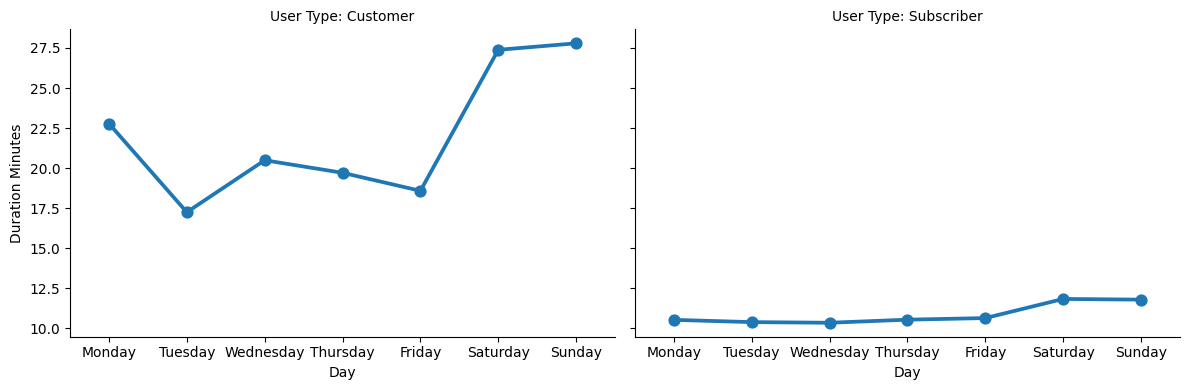

In [11]:
# with user type
g = sb.FacetGrid(df, col='user_type', height=4, aspect=1.5)
g.map(sb.pointplot, 'Day_S', 'duration_min', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
g.set_axis_labels('Day', 'Duration Minutes')
g.set_titles('User Type: {col_name}')
plt.tight_layout();

## Heatmap of Start/End Stations by Hour

> The start/end station heatmap highlights which stations are most active and during what times of the day. This reveals key insights about peak usage times and popular stations for different user groups.

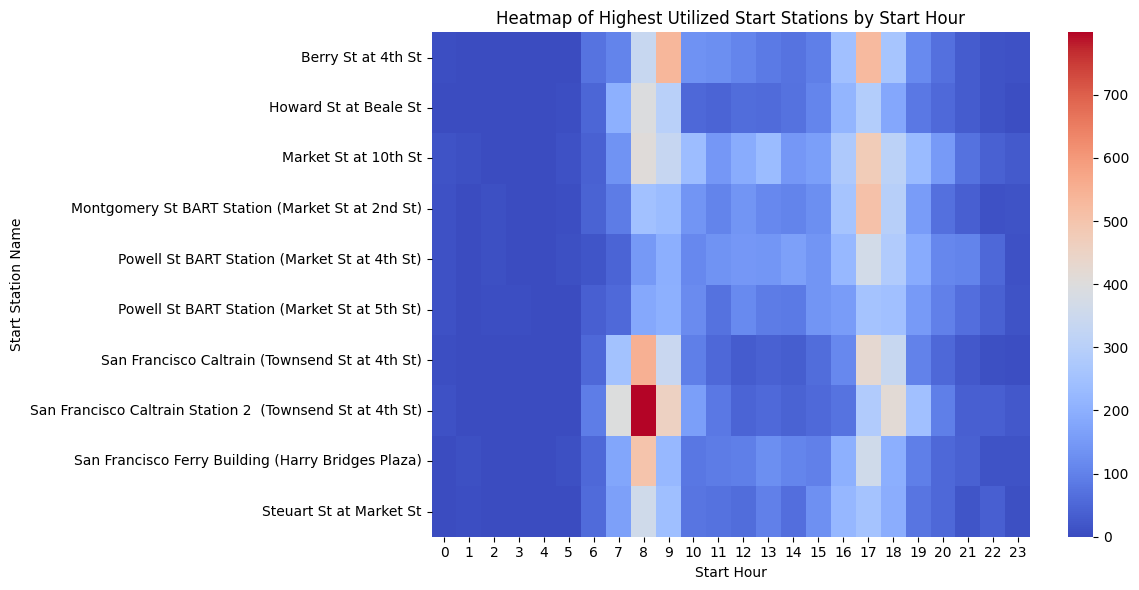

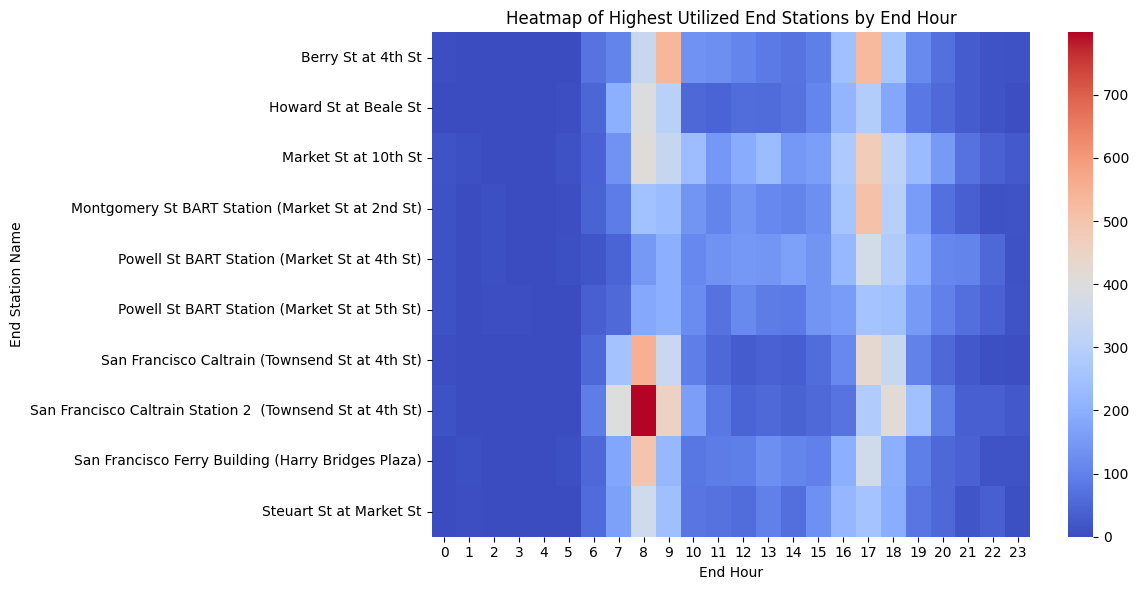

In [21]:
#start station and start time
t_stations = df['start_station_name'].value_counts().nlargest(10).index
df_top_stations = df[df['start_station_name'].isin(t_stations)] #showing highest stations
s_station = df_top_stations.pivot_table(index='start_station_name', columns='start_hr', values='Day_S', aggfunc='count', fill_value=0)
plt.figure(figsize=(12, 6))
sb.heatmap(s_station, cmap='coolwarm', annot=False)
plt.title('Heatmap of Highest Utilized Start Stations by Start Hour')
plt.xlabel('Start Hour')
plt.ylabel('Start Station Name')
plt.tight_layout()
plt.show()

#end station and end time

t_station_e = df['end_station_name'].value_counts().nlargest(10).index
df_top_e_stations = df[df['end_station_name'].isin(t_station_e)] #showing the highest number (end)
e_station = df_top_e_stations.pivot_table(index= 'end_station_name', columns = 'end_hr', values = 'Day_S', aggfunc = 'count', fill_value = 0)
plt.figure(figsize = (12,6))
sb.heatmap(s_station, cmap='coolwarm', annot=False)
plt.title('Heatmap of Highest Utilized End Stations by End Hour')
plt.xlabel('End Hour')
plt.ylabel('End Station Name')
plt.tight_layout()
plt.show()

## Distance Traveled vs. Duration by Gender and User Type

> This plot connects trip distance with trip duration, faceted by gender and user type. It illustrates how subscribers tend to take shorter, routine trips across genders, while customers have longer, more variable trip patterns.

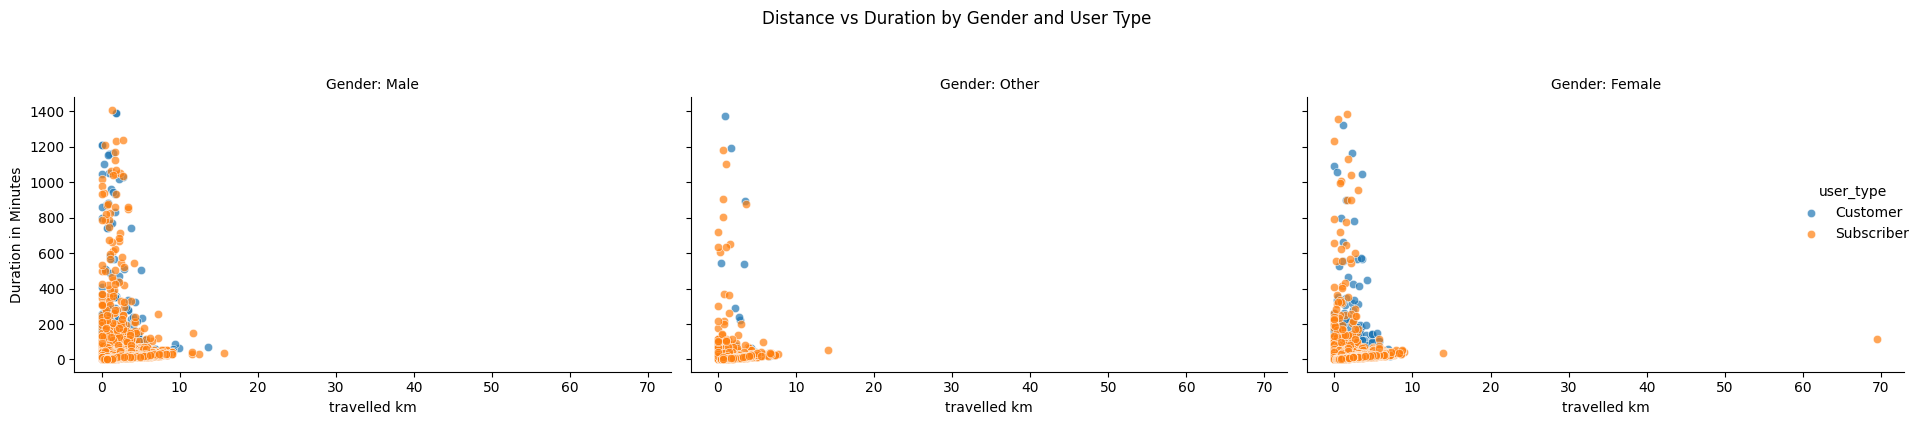

In [25]:
g = sb.FacetGrid(df, col='member_gender', hue='user_type', height=4, aspect=1.5)
g.map(sb.scatterplot, 'distance', 'duration_min', alpha=0.7, sizes=(20, 200), edgecolor='w')
g.add_legend()
g.set_axis_labels("travelled km", "Duration in Minutes")
g.set_titles("Gender: {col_name}")
g.fig.suptitle("Distance vs Duration by Gender and User Type", y=1.05)
plt.tight_layout();

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

## Trip Duration Across Weekdays by Gender

> This shows that male users have slightly longer trip durations, with a noticeable peak during weekends, while female and other gender users follow similar but less pronounced trends.

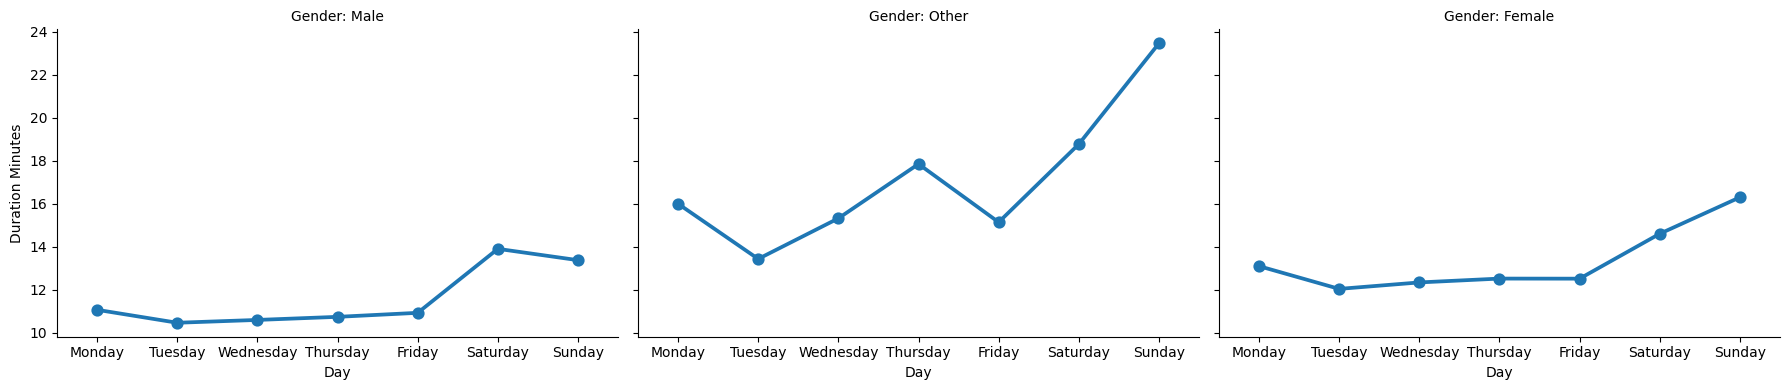

In [26]:
g = sb.FacetGrid(df, col='member_gender', height=4, aspect=1.5)
g.map(sb.pointplot, 'Day_S', 'duration_min', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
g.set_axis_labels('Day', 'Duration Minutes')
g.set_titles('Gender: {col_name}')
plt.tight_layout()
plt.show()

## Trip Duration Across Weekdays by Age Group

This plot demonstrates the age-specific patterns in trip duration, showing that older age groups (50-59 and 60+) tend to take significantly longer trips during weekends, particularly on Sundays.

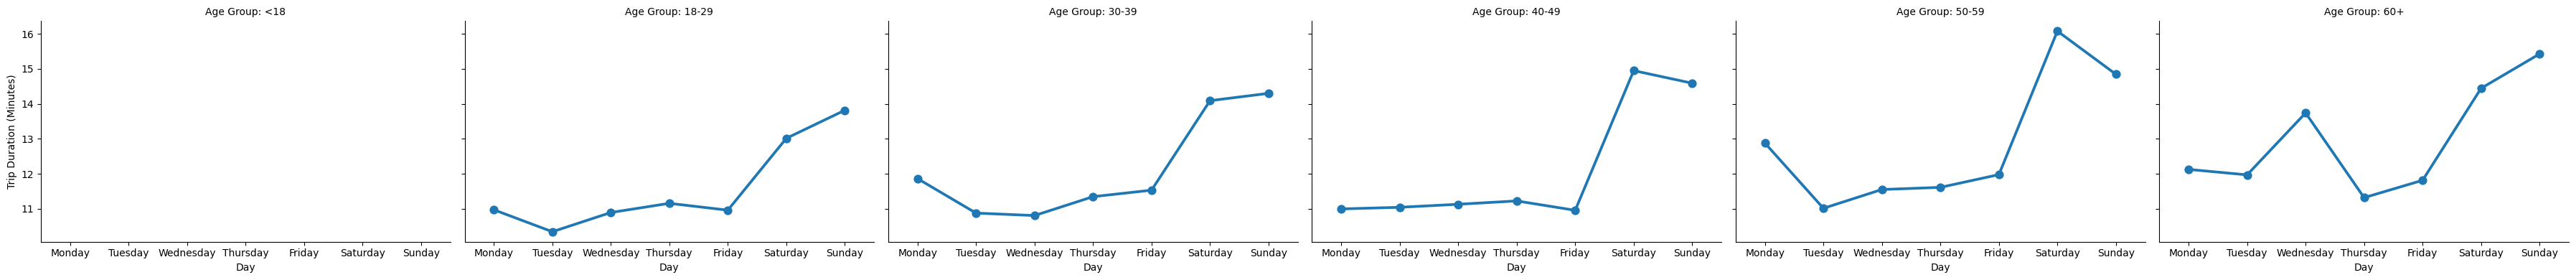

In [33]:
import datetime 
this_year = datetime.datetime.now().year
df['age'] = this_year - pd.to_numeric(df['member_birth_year'])
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 40, 50, 60, 100], labels=['<18', '18-29', '30-39', '40-49', '50-59', '60+'])
g = sb.FacetGrid(df, col='age_group', height=4, aspect=1.5)
g.map(sb.pointplot, 'Day_S', 'duration_min', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ci=None)
g.set_axis_labels('Day', 'Trip Duration (Minutes)')
g.set_titles('Age Group: {col_name}')
plt.tight_layout();

In [41]:
!jupyter nbconvert "Ford GoBike Vizualization Project_Presentation.ipynb" --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford GoBike Vizualization Project_Presentation.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 760539 bytes to Ford GoBike Vizualization Project_Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford GoBike Vizualization Project_Presentation.slides.html
Use Control-C to stop this server
